

# Project: Investigate FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data comes from the FBI's
National Instant Criminal Background
Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data has been
supplemented with state level data
from census.gov.
- The NICS data is found in one
sheet of an .xlsx file. It contains
the number of firearm checks by
month, state, and type.
- The U.S. census data is found
in a .csv file. It contains several
variables at the state level. Most
variables just have one data
point per state (2016), but a few
have data for more than one
year.

<a id='wrangling'></a>
## Data Wrangling

In this part of the analysis, i am going to import the necessay libraries that are useful for this project, i will import the FBI Gun dataset and the US sensus data.
I will display the important properties of the data such such mean, median and display to top rows of the dataset

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#load Gun data set
url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'
gun_data = pd.read_csv(url)

In [3]:
#display top 5 rows
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-04,Alabama,16150.0,236.0,20593.0,12513.0,1249.0,1041,0.0,21.0,...,0.0,0.0,0.0,16.0,19.0,4.0,0.0,1.0,0.0,54956
1,2022-04,Alaska,354.0,19.0,3425.0,2946.0,391.0,192,0.0,2.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,7589
2,2022-04,Arizona,25746.0,1305.0,20628.0,9300.0,1814.0,1253,0.0,7.0,...,0.0,0.0,0.0,16.0,10.0,0.0,0.0,0.0,0.0,61899
3,2022-04,Arkansas,2043.0,364.0,7659.0,5376.0,483.0,390,4.0,3.0,...,0.0,0.0,0.0,12.0,7.0,2.0,0.0,0.0,0.0,18222
4,2022-04,California,17944.0,12972.0,38217.0,25572.0,5595.0,5,1.0,1.0,...,158.0,0.0,0.0,7491.0,3186.0,698.0,23.0,7.0,0.0,116208


In [4]:
gun_data.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
15505,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
15506,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
15507,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
15508,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
15509,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [5]:
# statistical details of the data
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,15486.000000,4.125000e+03,15490.000000,15491.000000,8525.000000,15510.000000,15487.000000,13567.000000,13565.000000,8140.000000,...,4840.000000,4015.000000,3850.000000,5775.000000,5775.000000,5775.000000,5500.000000,5775.000000,5280.000000,1.551000e+04
mean,7477.605579,9.441435e+03,7382.750161,8024.963979,588.898534,306.887814,51.038807,5.141667,7.329672,0.408477,...,3.432025,0.139477,0.148571,52.051082,31.169177,5.658528,1.058182,0.975065,0.131061,2.700583e+04
std,26831.029024,6.031967e+04,10914.017822,9190.871934,1383.784381,777.745156,550.385303,11.307888,15.546089,1.419279,...,22.652690,0.951737,0.956717,417.743340,182.109269,37.808728,5.038520,4.012848,0.523244,4.988908e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,1077.000000,2201.500000,33.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.174250e+03
50%,881.000000,0.000000e+00,3647.500000,5331.000000,194.000000,137.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.370900e+04
75%,5843.750000,1.160000e+02,8924.750000,10872.000000,627.000000,341.000000,0.000000,5.000000,7.000000,0.000000,...,1.000000,0.000000,0.000000,16.000000,15.000000,2.000000,0.000000,1.000000,0.000000,3.015050e+04
max,522188.000000,1.350676e+06,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,592.000000,13.000000,12.000000,10623.000000,4159.000000,829.000000,70.000000,62.000000,18.000000,1.427917e+06


**describe()** is a function used on a pandas dataset to find easily the **count** number of entries in the dataset, the **mean** of the dataset, the standart deviation denoted as **std** the minimun values in the dataset **min**, the **25% 50% and 70%**  the maximun values of each column are also given by the **max**

In [6]:
gun_data.shape

(15510, 27)

The data have 15510 rows and 27 colums

In [7]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15510 non-null  object 
 1   state                      15510 non-null  object 
 2   permit                     15486 non-null  float64
 3   permit_recheck             4125 non-null   float64
 4   handgun                    15490 non-null  float64
 5   long_gun                   15491 non-null  float64
 6   other                      8525 non-null   float64
 7   multiple                   15510 non-null  int64  
 8   admin                      15487 non-null  float64
 9   prepawn_handgun            13567 non-null  float64
 10  prepawn_long_gun           13565 non-null  float64
 11  prepawn_other              8140 non-null   float64
 12  redemption_handgun         13570 non-null  float64
 13  redemption_long_gun        13569 non-null  flo

the **info()** function gives the information about the dataset, the number of rows and the number of columns, it provides the datatype for each column

In [8]:
#display each column name
gun_data.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

In [9]:
# Calculating the number of missing values in each column
for x in range(1):
    print(gun_data.isnull().sum())

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64


The above function calculates the number of missing values for each column

# Census data
Getting to know about the census data

In [10]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv'

census_data = pd.read_csv(url)

In [11]:
# top 5 rows of the census data
census_data.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [12]:
# last 5 rows of the dataset
census_data.tail(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#shape of the census dataset
census_data.shape

(85, 52)

the census dataset contains 85 rows and 52 columns

In [14]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [15]:
# function to count null values in census data
for x in range(1):
    print(census_data.isnull().sum())

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [16]:
# description of the census dataset
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


The data contains only objects, the **desribe()** function gives the **count**, number of non-null values in a colum, **unique** is the number of unique values in a column, **top** is the mpst common value and **freq** is the most common frequency of a value

In [17]:
# display each column name
census_data.columns.values

array(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

## Data cleaning
In this step i am going to clean both datasets. Some sates in the Gun dataset are not included in the Census dataset so it will better to remove them and merge both datasets.

In [18]:
# Copy of the census data and drop of two clumns 'Fact' and 'Fact note'
census_data_2 = census_data.copy()
census_data_2 = census_data_2.drop(['Fact','Fact Note'], axis=1)

I created a copy of census data so my experiement will be on the copy, hence i can apply the result on the main dataset.
The Gun and census dataset have a same column called **state**, i will later combine the two dataset on the basis of having state as a commun column. I dropped **Fact** and **Fact Note** so that merging the two dataset will be easier

In [19]:
census_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Alabama         65 non-null     object
 1   Alaska          65 non-null     object
 2   Arizona         65 non-null     object
 3   Arkansas        65 non-null     object
 4   California      65 non-null     object
 5   Colorado        65 non-null     object
 6   Connecticut     65 non-null     object
 7   Delaware        65 non-null     object
 8   Florida         65 non-null     object
 9   Georgia         65 non-null     object
 10  Hawaii          65 non-null     object
 11  Idaho           65 non-null     object
 12  Illinois        65 non-null     object
 13  Indiana         65 non-null     object
 14  Iowa            65 non-null     object
 15  Kansas          65 non-null     object
 16  Kentucky        65 non-null     object
 17  Louisiana       65 non-null     object
 18  Maine       

The **info()** function helps to see the change in the copy of census dataset

In [20]:
#creating a new column, and fill it with the names of the other columns.
census_data_2['state2'] = pd.Series(census_data_2.columns.values) 

In [21]:
census_data_2.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,state2
0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501",Alabama
1,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767",Alaska
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%,Arizona
3,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626",Arkansas
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%,California


Created a column called state2 that contains the name of the state

In [22]:
#dropping all the columns except state2 column. 
census_data_2.drop(census_data_2.columns.difference(['state2']), 1,inplace=True)

C:\Users\aleza\AppData\Local\Temp\ipykernel_5380\3716365741.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  census_data_2.drop(census_data_2.columns.difference(['state2']), 1,inplace=True)


In [23]:
census_data_2.columns.values

array(['state2'], dtype=object)

I dropped all column except state2 because i need the name of state in the next steps for comparison

In [24]:
census_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state2  50 non-null     object
dtypes: object(1)
memory usage: 808.0+ bytes


In [25]:
#dropping all the null values in case there's any.
census_data_2 = census_data_2.dropna()
census_data_2

,state2
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


Gun dataset
In this step, i will repeat the same steps i applied on the census dataset

In [26]:
gun_data2 = gun_data.copy()

In [27]:
#create a column called state1 and fill it with states name of the gun dataset
gun_data2['state1'] = pd.Series(gun_data2['state'].unique())

In [28]:
gun_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15510 non-null  object 
 1   state                      15510 non-null  object 
 2   permit                     15486 non-null  float64
 3   permit_recheck             4125 non-null   float64
 4   handgun                    15490 non-null  float64
 5   long_gun                   15491 non-null  float64
 6   other                      8525 non-null   float64
 7   multiple                   15510 non-null  int64  
 8   admin                      15487 non-null  float64
 9   prepawn_handgun            13567 non-null  float64
 10  prepawn_long_gun           13565 non-null  float64
 11  prepawn_other              8140 non-null   float64
 12  redemption_handgun         13570 non-null  float64
 13  redemption_long_gun        13569 non-null  flo

The gun_data2 dataset has already state column, the new state1 column holds unique ones

In [29]:
gun_data2.drop(gun_data2.columns.difference(['state1']),1, inplace=True)

C:\Users\aleza\AppData\Local\Temp\ipykernel_5380\2356454542.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gun_data2.drop(gun_data2.columns.difference(['state1']),1, inplace=True)


In [30]:
gun_data2.columns.values

array(['state1'], dtype=object)

In [31]:
gun_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state1  55 non-null     object
dtypes: object(1)
memory usage: 121.3+ KB


In [32]:
gun_data2=gun_data2.dropna()

In [33]:
gun_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state1  55 non-null     object
dtypes: object(1)
memory usage: 880.0+ bytes


Merge the census_data2 and gun_data_2

In [34]:
#census_data_2.shape

In [35]:
#gun_data2.shape

In [36]:
#merging the two datasets
sensus_gun_data = gun_data2.merge(census_data_2,how='left', left_on=['state1'], right_on=['state2'])
sensus_gun_data

,state1,state2
0,Alabama,Alabama
1,Alaska,Alaska
2,Arizona,Arizona
3,Arkansas,Arkansas
4,California,California
5,Colorado,Colorado
6,Connecticut,Connecticut
7,Delaware,Delaware
8,District of Columbia,NaN
9,Florida,Florida


The **merge()** function merged the two dataset from left to right, on the left hand side we have the state1 and the state2 on the right hand side

In [37]:
#extracting the NaN values only
gun_data2[sensus_gun_data['state2'].isna()]

,state1
8,District of Columbia
11,Guam
21,Mariana Islands
41,Puerto Rico
49,Virgin Islands


Some states are not included in the census dataset, i am dropping them in the next step

In [38]:
gun_data = gun_data[gun_data.state != 'Guam']
gun_data = gun_data[gun_data.state != 'Puerto Rico']
gun_data = gun_data[gun_data.state != 'District of Columbia']
gun_data = gun_data[gun_data.state != 'Virgin Islands']
gun_data = gun_data[gun_data.state != 'Mariana Islands']

In [39]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14100 entries, 0 to 15509
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14100 non-null  object 
 1   state                      14100 non-null  object 
 2   permit                     14098 non-null  float64
 3   permit_recheck             3750 non-null   float64
 4   handgun                    14100 non-null  float64
 5   long_gun                   14100 non-null  float64
 6   other                      7750 non-null   float64
 7   multiple                   14100 non-null  int64  
 8   admin                      14098 non-null  float64
 9   prepawn_handgun            12347 non-null  float64
 10  prepawn_long_gun           12345 non-null  float64
 11  prepawn_other              7400 non-null   float64
 12  redemption_handgun         12350 non-null  float64
 13  redemption_long_gun        12348 non-null  flo

The 5 extra states are deleted from the gun dataset

In [40]:
#I'm going to create a table with the data needed to match the Census dataset and prepare it for merging later.
gun_Capita= gun_data[['month','state','totals']]


I create a new dataframe called gun_capita with month, state and totals as columns

In [41]:
#display top 5 rows of the gun per capita dataset
gun_Capita.head()

,month,state,totals
0,2022-04,Alabama,54956
1,2022-04,Alaska,7589
2,2022-04,Arizona,61899
3,2022-04,Arkansas,18222
4,2022-04,California,116208


In [42]:
gun_Capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14100 entries, 0 to 15509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   14100 non-null  object
 1   state   14100 non-null  object
 2   totals  14100 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 440.6+ KB


The month is an object, i need to convert into data format in the next step

In [43]:
gun_Capita['month'] = pd.to_datetime(gun_data['month'])


C:\Users\aleza\AppData\Local\Temp\ipykernel_5380\792305102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_Capita['month'] = pd.to_datetime(gun_data['month'])


In [44]:
gun_Capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14100 entries, 0 to 15509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   14100 non-null  datetime64[ns]
 1   state   14100 non-null  object        
 2   totals  14100 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 440.6+ KB


In [45]:
gun_Capita.head()

,month,state,totals
0,2022-04-01,Alabama,54956
1,2022-04-01,Alaska,7589
2,2022-04-01,Arizona,61899
3,2022-04-01,Arkansas,18222
4,2022-04-01,California,116208


Now the date is in date format and i can extract the needed data

In [46]:
#I'm going to extract the data of the 1st of July,2016 then do the same with the 1st of April,2010
gun2016= gun_Capita[gun_Capita['month']== '2016-07-01']
gun2016.head()

,month,state,totals
3795,2016-07-01,Alabama,48927
3796,2016-07-01,Alaska,6793
3797,2016-07-01,Arizona,34496
3798,2016-07-01,Arkansas,19378
3799,2016-07-01,California,190218


In [47]:
#I'm going to extract the data of the 1st of 2010-04-01 then do the same with the 1st of April,2010
gun2010= gun_Capita[gun_Capita['month']== '2010-04-01']
gun2010.head()

,month,state,totals
7920,2010-04-01,Alabama,20791
7921,2010-04-01,Alaska,6411
7922,2010-04-01,Arizona,16578
7923,2010-04-01,Arkansas,14563
7924,2010-04-01,California,80750


In [48]:
# check for missing values
gun_data.isnull().sum()

month                            0
state                            0
permit                           2
permit_recheck               10350
handgun                          0
long_gun                         0
other                         6350
multiple                         0
admin                            2
prepawn_handgun               1753
prepawn_long_gun              1755
prepawn_other                 6700
redemption_handgun            1750
redemption_long_gun           1752
redemption_other              6700
returned_handgun              9350
returned_long_gun             9400
returned_other                9700
rentals_handgun              10450
rentals_long_gun             10600
private_sale_handgun          8850
private_sale_long_gun         8850
private_sale_other            8850
return_to_seller_handgun      9100
return_to_seller_long_gun     8850
return_to_seller_other        9300
totals                           0
dtype: int64

There is no null value for month, state and total so it will not affect my analysis

I am going to repeat the same steps for the census dataset

In [49]:
cen_data = census_data.copy()

In [50]:
cen_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [51]:
#dropping 'Fact Note' column since it won't be needed 
cen_data=cen_data.drop('Fact Note',axis=1)

In [52]:
#setting 'Fact' column as an index
cen_data.set_index('Fact',inplace=True)

In [53]:
#applying the transpose method and resetting the index
cen_data = cen_data.T.reset_index()

In [54]:
cen_data.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:


#renameing the 'index' column to 'state' so it would make more sense
cen_data=cen_data.rename(columns={'index':'State'})



In [56]:
cen_data.tail()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
45,Virginia,"8,411,808","8,001,041",5.10%,"8,001,024",6.10%,6.40%,22.20%,23.20%,14.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Washington,"7,288,000","6,724,545",8.40%,"6,724,540",6.20%,6.50%,22.40%,23.50%,14.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,West Virginia,"1,831,102","1,853,011",-1.20%,"1,852,994",5.50%,5.60%,20.50%,20.90%,18.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Wisconsin,"5,778,708","5,687,289",1.60%,"5,686,986",5.80%,6.30%,22.30%,23.60%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Wyoming,"585,501","563,767",3.90%,"563,626",6.50%,7.10%,23.70%,24.00%,15.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
cen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 86 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   State                                                                                   50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

In [58]:
#dropping the unneeded columns
cen_data.drop(cen_data.iloc[:, 66:86], inplace = True, axis = 1)

I removed column that i do not need

In [59]:
#replacing NaN values with 0.0
cen_data=cen_data.fillna(0.0)

In [60]:
# checking if there's any missing value, and if yes I want to see it
cen = cen_data[cen_data.isna().any(axis=1)]


In [61]:
cen

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code


The output has 0 row so there is no missing value,

In [62]:
#cen.columns.values

In [63]:
#creating a new dataframe with only these columns
cen2016= cen_data[['State', 'Population estimates, July 1, 2016,  (V2016)']]
cen2016.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"


In [64]:
#first, instead of (,) I'll put an empty('') as to eliminate the (,)
cen2016['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)


C:\Users\aleza\AppData\Local\Temp\ipykernel_5380\1190949369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cen2016['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)


In [65]:
cen2016.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


In [66]:
#Secons, I'm going to convert the Population estimates, July 1, 2016, (V2016) column from object to float
cen2016['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(cen2016['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')


C:\Users\aleza\AppData\Local\Temp\ipykernel_5380\2175949921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cen2016['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(cen2016['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')


In [67]:
cen2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)  50 non-null     float32
dtypes: float32(1), object(1)
memory usage: 728.0+ bytes


In [68]:
cen2016.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,4863300.0
1,Alaska,741894.0
2,Arizona,6931071.0
3,Arkansas,2988248.0
4,California,39250016.0


In [69]:


#getting the sum of the 'Population estimates, July 1, 2016,  (V2016)' column
cen16=cen2016['Population estimates, July 1, 2016,  (V2016)'].sum()
cen16



322446340.0

In the following cells, i will foloew the same steps for 2010 data

In [70]:
cen2010 = cen_data[['State','Population estimates base, April 1, 2010,  (V2016)']]
cen2010

Fact,State,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,"4,780,131"
1,Alaska,"710,249"
2,Arizona,"6,392,301"
3,Arkansas,"2,916,025"
4,California,"37,254,522"
5,Colorado,"5,029,324"
6,Connecticut,"3,574,114"
7,Delaware,"897,936"
8,Florida,"18,804,592"
9,Georgia,"9,688,680"


In [71]:
cen2010['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)


C:\Users\aleza\AppData\Local\Temp\ipykernel_5380\581825734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cen2010['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)


In [72]:
cen2010.head()

Fact,State,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,4780131
1,Alaska,710249
2,Arizona,6392301
3,Arkansas,2916025
4,California,37254522


In [73]:
cen2010['Population estimates base, April 1, 2010,  (V2016)']= pd.to_numeric(cen2010['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors='ignore')


C:\Users\aleza\AppData\Local\Temp\ipykernel_5380\2074825473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cen2010['Population estimates base, April 1, 2010,  (V2016)']= pd.to_numeric(cen2010['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors='ignore')


In [74]:
cen2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State                                               50 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float32
dtypes: float32(1), object(1)
memory usage: 728.0+ bytes


In [75]:
cen2010.head()

Fact,State,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,4780131.0
1,Alaska,710249.0
2,Arizona,6392301.0
3,Arkansas,2916025.0
4,California,37254520.0


In [76]:
cen10 = cen2010['Population estimates base, April 1, 2010,  (V2016)'].sum()
cen10

308156350.0

Merging. In the next cells, i am going to merge the datsets

In [77]:
# cen2016.reset_index(drop=True).head()

In [78]:
# cen2010.reset_index(drop=True).head()

In [79]:
# gun2010= gun2010.reset_index(drop=True)
# gun2010.head()

In [80]:
#merging the Census 2010 and 2016 data to use it in answering question1
census_merged_data = cen2010.merge(cen2016, on='State', how='left')
census_merged_data.head()


Fact,State,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,Alabama,4780131.0,4863300.0
1,Alaska,710249.0,741894.0
2,Arizona,6392301.0,6931071.0
3,Arkansas,2916025.0,2988248.0
4,California,37254520.0,39250016.0


In [81]:
census_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State                                               50 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float32
 2   Population estimates, July 1, 2016,  (V2016)        50 non-null     float32
dtypes: float32(2), object(1)
memory usage: 1.2+ KB


In [82]:
##merging the Gun 2010 and 2016 data to use it in answering question1
gun_merged_data= gun2010.merge(gun2016, on='state', how='left')
gun_merged_data.head()

,month_x,state,totals_x,month_y,totals_y
0,2010-04-01,Alabama,20791,2016-07-01,48927
1,2010-04-01,Alaska,6411,2016-07-01,6793
2,2010-04-01,Arizona,16578,2016-07-01,34496
3,2010-04-01,Arkansas,14563,2016-07-01,19378
4,2010-04-01,California,80750,2016-07-01,190218


In [83]:
# a method to convert whatever value to percentage value
def percentage(arg):
    percnt= arg*100
    return percnt


3 Exploratory Data Analysis


3.1 Question 1: What is the percentage of guns per capita

What is the estimated number of gun registered per capita in 2010 and 2016

In [84]:
#Gun per capita in 2010
Capita10= gun_merged_data['totals_x'].sum()/census_merged_data['Population estimates base, April 1, 2010,  (V2016)'].sum()
Capita10

0.003978133152355075

In [85]:
#Gun per capita in 2016
Capita16= gun_merged_data['totals_y'].sum()/census_merged_data['Population estimates, July 1, 2016,  (V2016)'].sum()
Capita16

0.00677793404977627

In [86]:
#getting the percentage
percentage(Capita16)

0.677793404977627

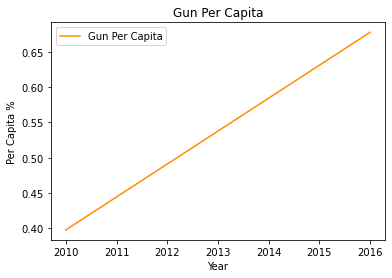

In [87]:
#ploting the relationship of gun per capita for 2010 and 2016
PerCapita= [0.39781331523550745, 0.677793404977627]
Year= [2010,2016]

plt.title('Gun Per Capita')
plt.xlabel('Year')
plt.ylabel('Per Capita %')

plt.plot(Year, PerCapita,'darkorange',label='Gun Per Capita')
plt.legend(loc="upper left")
plt.show()


 - 2010's gun per capita is 0.39781331523550745%
 - 2016's gun per capita is 0.677793404977627%

And as the chart shows, it has increased since 2010 by approximetly 70%

Question 2: What is the overall gun trend



In [88]:
#creating a dataframe that copies only the dates that starts with 2021 
gun_data_2021 = gun_data[gun_data['month'].str.match('2021')]

In [89]:
gun_data_2021['handgun'].sum()

9932120.0

In [90]:
gun_data_2021['long_gun'].sum()

6491750.0

In [91]:
gun_data_2021['other'].sum()

770782.0

In [92]:
gun_data_2021['multiple'].sum()

327875

In [93]:
#creating a list of the firearms types
gun_type= ['Handgun', 'Long Gun', 'Other', 'Multiple']

In [94]:
#creating a list of sum result
bought=[9932120, 6491750, 770782, 327875]

i created the lists gun_tyoe and bought in order to create a relationship

In [95]:
#to determine the x axis ticks
gun_type_x=np.arange(len(gun_type))
gun_type_x

array([0, 1, 2, 3])

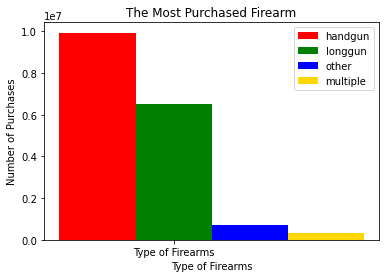

In [96]:
N = 1
ind = np.arange(N) 
width = 0.3
 
xvals = [9932120]#Total of handgun
bar1 = plt.bar(ind, xvals, width, color = 'red')
  
yvals = [6491750]#Total of long gun
bar2 = plt.bar(ind+width, yvals, width, color='green')
  
zvals = [707823]#Total of other
bar3 = plt.bar(ind+width*2, zvals, width, color = 'blue')
z2vals = [327875]#Total of multiple
bar4 = plt.bar(ind+width*3, z2vals, width, color = 'gold')
  
plt.xlabel("Type of Firearms")
plt.ylabel('Number of Purchases')
plt.title("The Most Purchased Firearm")
  
plt.xticks(ind+width,['Type of Firearms'])
plt.legend( (bar1, bar2, bar3,bar4), ('handgun', 'longgun', 'other','multiple') )
plt.show()

The most purchased guns in the USA in 2021 arranged from the highest to lowest

**1** Handgun 9932120 

**2** Lon gun 6491750

**3** Other 770782

**4** Multiple 327875

Question 3: Which state had the highest gun registered in 2021


In [97]:
#creating a dataframe that copies only the dates that starts with 2021 
gun_data_2021 = gun_data[gun_data['month'].str.match('2021')]

In [98]:
gun_data_2021.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
220,2021-12,Alabama,27674.0,281.0,30428.0,26932.0,1875.0,1498,0.0,13.0,...,0.0,0.0,0.0,37.0,29.0,8.0,2.0,1.0,0.0,92191
221,2021-12,Alaska,41.0,29.0,3448.0,3216.0,481.0,220,0.0,0.0,...,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,7640
222,2021-12,Arizona,3106.0,485.0,25636.0,13507.0,2135.0,1363,0.0,13.0,...,1.0,0.0,0.0,30.0,11.0,2.0,1.0,1.0,0.0,47985
223,2021-12,Arkansas,2197.0,450.0,11633.0,11675.0,717.0,542,1.0,8.0,...,0.0,0.0,0.0,8.0,11.0,3.0,1.0,1.0,0.0,29247
224,2021-12,California,15528.0,11409.0,46627.0,31488.0,5894.0,0,0.0,0.0,...,185.0,0.0,0.0,6912.0,3149.0,582.0,34.0,11.0,0.0,124997


In [99]:
#sorting the total in a descending way based on the totals column
gun_data_2021.sort_values(by=['totals'], axis = 0, ascending = False).head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
729,2021-03,Illinois,23382.0,1350676.0,35699.0,16114.0,0.0,2046,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1427917
839,2021-01,Illinois,34093.0,912211.0,35848.0,17817.0,0.0,2149,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1002118
619,2021-05,Illinois,16682.0,945297.0,25210.0,9855.0,0.0,1282,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998326
674,2021-04,Illinois,21918.0,889304.0,30084.0,12523.0,0.0,1610,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,955439
784,2021-02,Illinois,18820.0,846252.0,24290.0,11338.0,0.0,1320,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,902020


The state of Illinois had the highest gun registration in 2021

<AxesSubplot:title={'center':'Gun registration per state in 2021'}, xlabel='States', ylabel='Totals'>

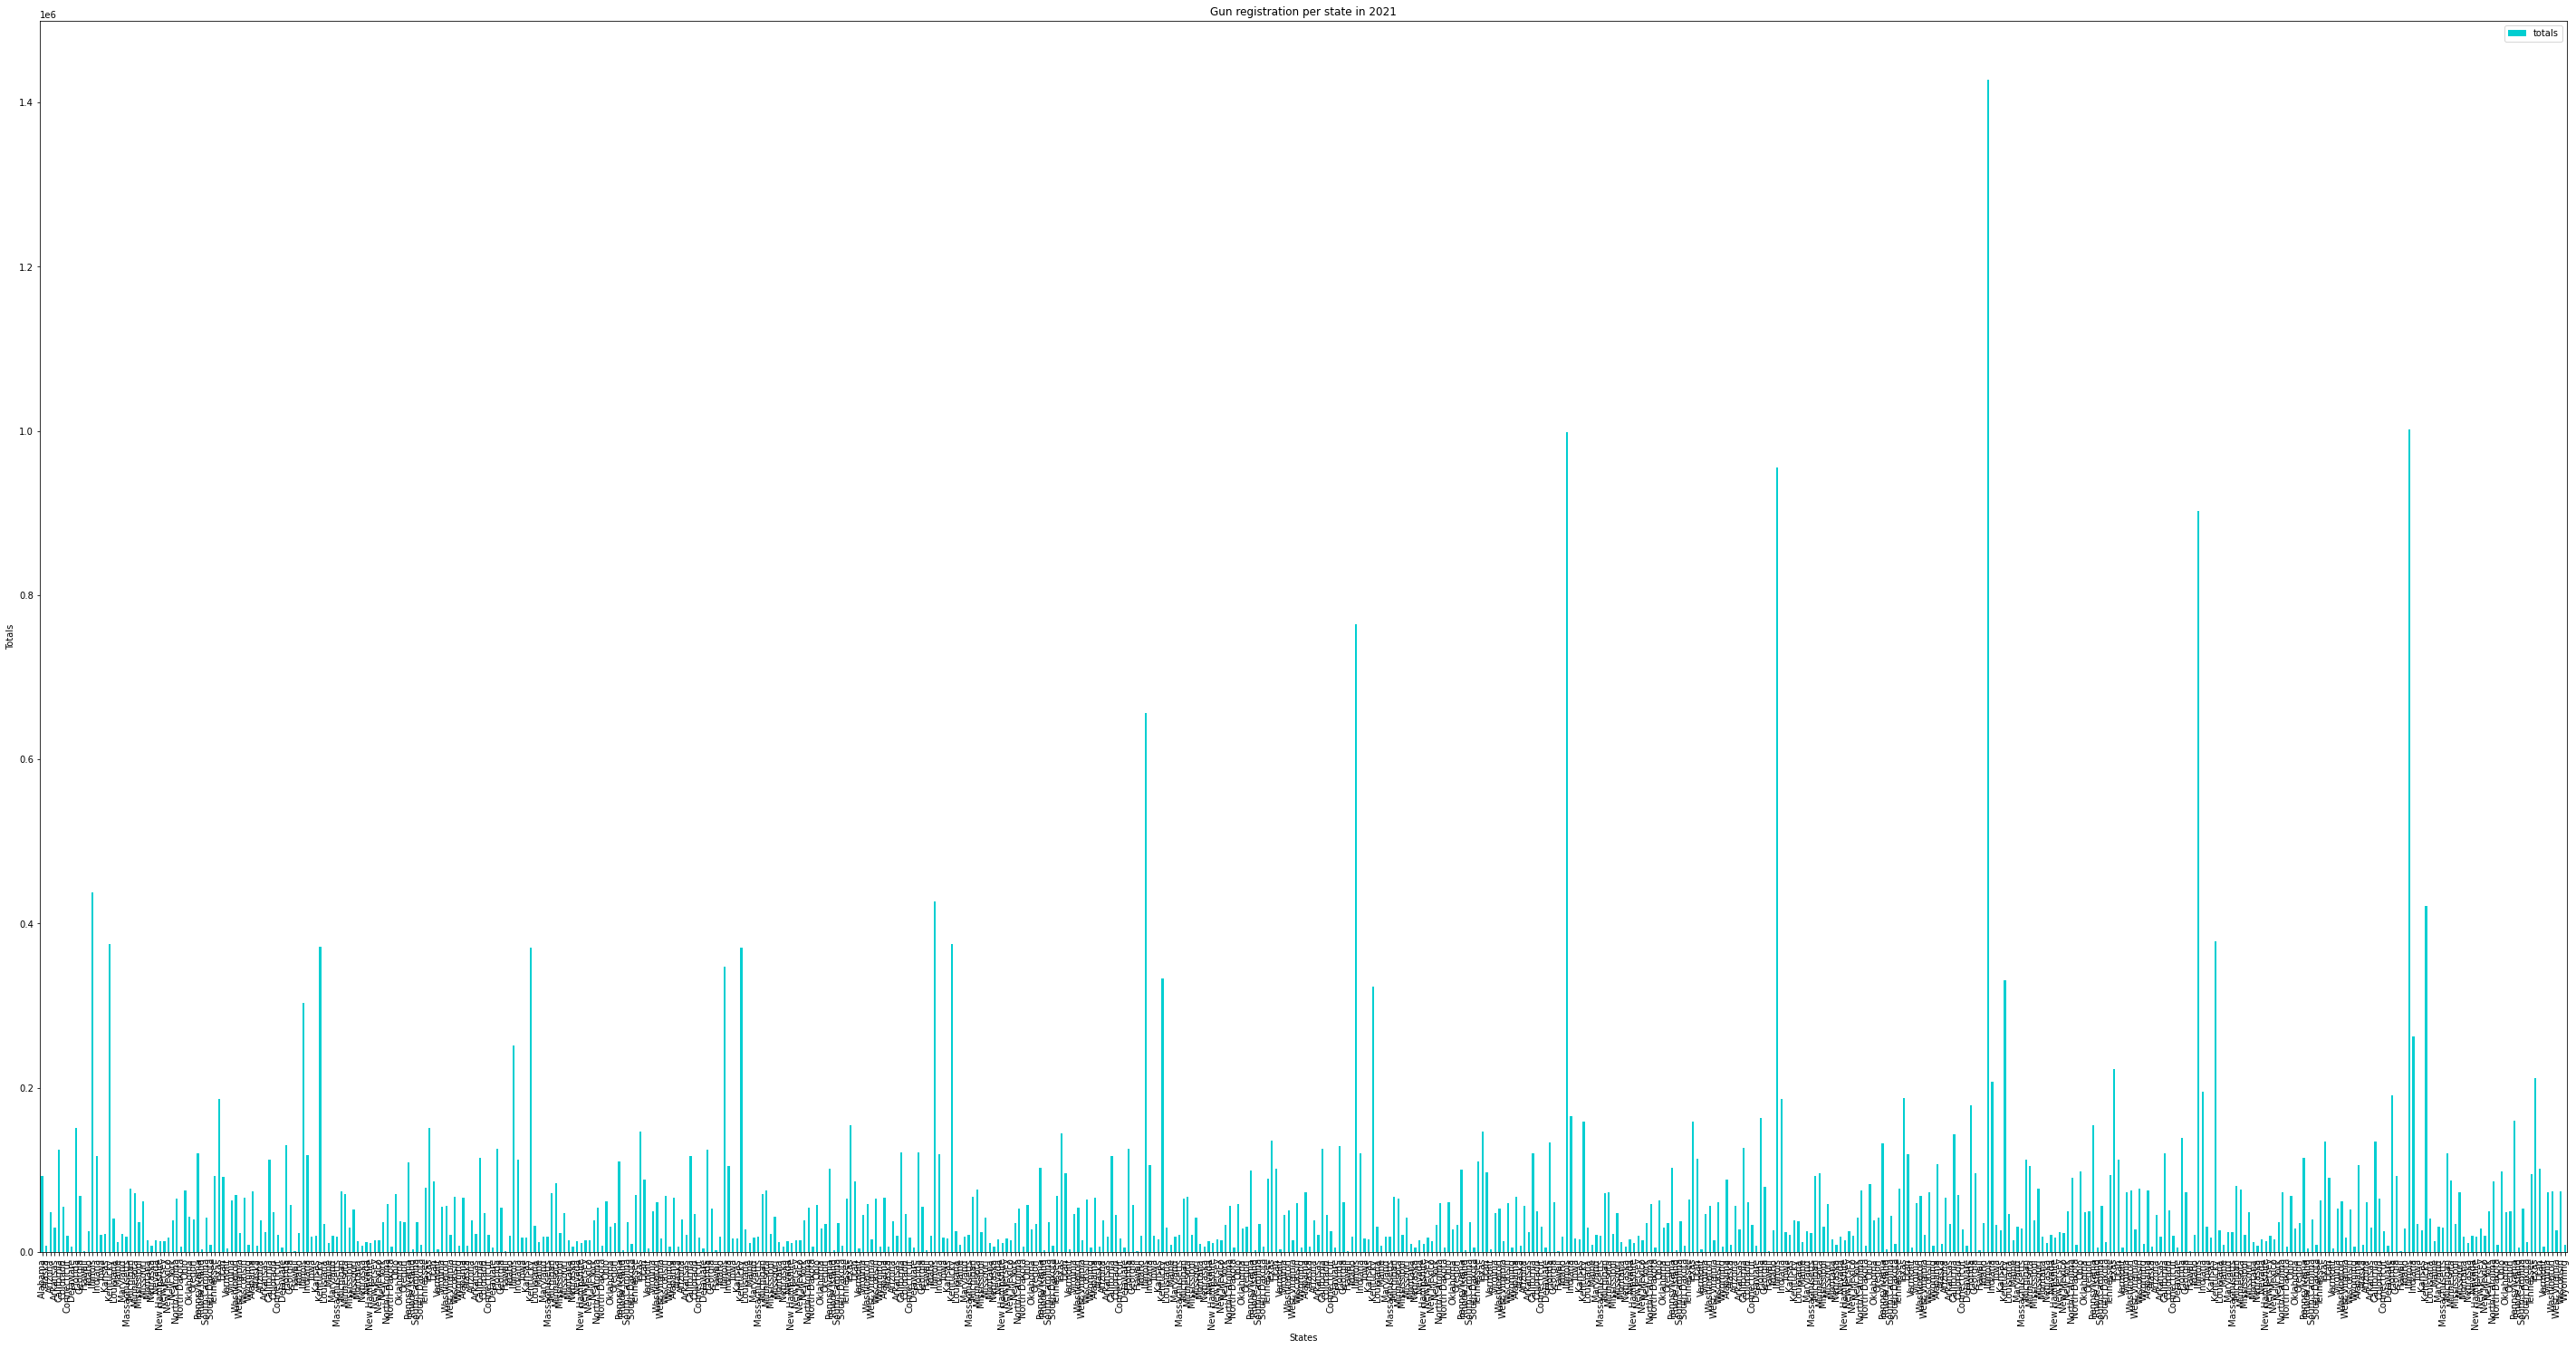

In [100]:
# # #plotting the relationship and finding the highest gun ownership in 2021 based on the states

gun_data_2021.plot(x='state', y='totals', kind='bar',
                   color='darkturquoise',figsize = (50,25),
                   xlabel='States', ylabel='Totals',
                   title='Gun registration per state in 2021' )



Question 4: Which year has the lowest and the highest checks

In [101]:
#the most
gun_data.sort_values(by=['totals'], axis = 0, ascending = False).head(100)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
729,2021-03,Illinois,23382.0,1350676.0,35699.0,16114.0,0.0,2046,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1427917
839,2021-01,Illinois,34093.0,912211.0,35848.0,17817.0,0.0,2149,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1002118
619,2021-05,Illinois,16682.0,945297.0,25210.0,9855.0,0.0,1282,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998326
674,2021-04,Illinois,21918.0,889304.0,30084.0,12523.0,0.0,1610,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,955439
784,2021-02,Illinois,18820.0,846252.0,24290.0,11338.0,0.0,1320,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,902020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,2019-08,Kentucky,1628.0,291623.0,10802.0,6592.0,475.0,592,1.0,32.0,...,0.0,0.0,0.0,33.0,22.0,3.0,0.0,1.0,0.0,315348
3428,2017-02,Kentucky,283492.0,0.0,14975.0,8636.0,253.0,1044,0.0,15.0,...,0.0,0.0,0.0,28.0,17.0,0.0,0.0,0.0,3.0,313748
4198,2015-12,Kentucky,258154.0,NaN,25569.0,19995.0,607.0,896,0.0,15.0,...,0.0,NaN,NaN,17.0,10.0,1.0,2.0,1.0,0.0,308824
2163,2019-01,Kentucky,290432.0,0.0,8170.0,6213.0,510.0,450,4.0,22.0,...,0.0,0.0,0.0,22.0,13.0,4.0,0.0,1.0,0.0,308573


In [102]:
#the least
gun_data.sort_values(by=['totals'], axis = 0).head(100)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
15498,1998-11,South Carolina,0.0,NaN,0.0,6.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
15495,1998-11,Pennsylvania,0.0,NaN,5.0,8.0,NaN,4,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
15469,1998-11,Illinois,4.0,NaN,0.0,18.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
15505,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
15467,1998-11,Hawaii,27.0,NaN,0.0,1.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12387,2003-07,Hawaii,584.0,NaN,0.0,0.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584
12662,2003-02,Hawaii,584.0,NaN,0.0,0.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584
13322,2002-02,Hawaii,586.0,NaN,0.0,0.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,586
13982,2001-02,Hawaii,587.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587


In [103]:
year=[1998,2021]
data=[gun_data.totals.min(), gun_data.totals.max()]

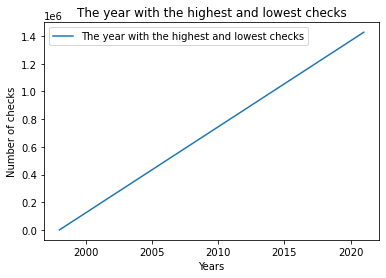

In [104]:
plt.title('The year with the highest and lowest checks')
plt.xlabel('Years')
plt.ylabel('Number of checks')
plt.plot(year, data,label='The year with the highest and lowest checks')
plt.legend(loc="upper left")
plt.show()

2021 had the higest gun registration and 1998 had the lowest

# 4. Conclusion

In conclusion, the Gun dataset and the census dataset share similar columns such as data and state columns. From the analysis I did in the above sections, I come into the conclusion that the gun registration per capita is 0.39781331523550745% in 2010, while in 2016 it is equal to 0.677793404977627%, this shows an increase of 70%. In 2021, the hand guns are the most registered, 9932120 records or handgun have been registered and multiple guns are the least registered in 2021 with a record of 327875. Furthermore, the state of Illinois had the highest registered guns in 2021. 2021 had the highest gun registration and 1998 had the lowest.

The datasets have some few limitations, the census dataset had many missing values, those missing values could contribute in the accuracy of the analysis, five districts (District of Columbia, Guam, Mariana Islands, Puerto Rico and Virgin Islands) were missing. The results of the analysis might change once I had these missing values. 


# 